<a href="https://colab.research.google.com/github/Aagam018/WT-Project/blob/main/Predict_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow numpy matplotlib



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the images to values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Print the shape of the dataset
print(f"Training images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


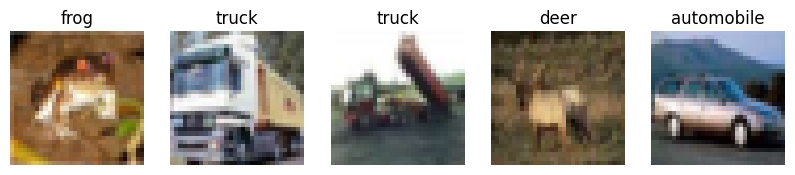

In [ ]:
# Class labels for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the first 5 training images
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()


In [ ]:
model = models.Sequential([
    # Convolutional layer with 32 filters, kernel size 3x3, and ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the 3D outputs to 1D
    layers.Flatten(),

    # Fully connected (dense) layer
    layers.Dense(64, activation='relu'),

    # Output layer with 10 neurons (one for each class)
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 41ms/step - accuracy: 0.3578 - loss: 1.7371 - val_accuracy: 0.5530 - val_loss: 1.2639
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.5768 - loss: 1.1882 - val_accuracy: 0.6154 - val_loss: 1.0889
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.6435 - loss: 1.0158 - val_accuracy: 0.6354 - val_loss: 1.0500
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.6838 - loss: 0.9072 - val_accuracy: 0.6577 - val_loss: 1.0006
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7087 - loss: 0.8258 - val_accuracy: 0.6880 - val_loss: 0.8916
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.7379 - loss: 0.7486 - val_accuracy: 0.6855 - val_loss: 0.9188
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7489 - loss: 0.7102 - val_accuracy: 0.6904 - val_loss: 0.8956
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - accuracy: 0.7732 -

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7180 - loss: 0.8491
Test accuracy: 0.7171000242233276


In [ ]:
# Make predictions on the test set
predictions = model.predict(test_images)

# Print the predicted label for the first test image
predicted_label = np.argmax(predictions[2])
print(f"Predicted label: {class_names[predicted_label]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Predicted label: ship


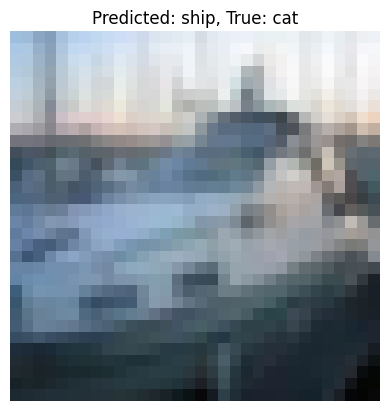

In [ ]:
plt.imshow(test_images[2])
plt.title(f"Predicted: {class_names[predicted_label]}, True: {class_names[test_labels[0][0]]}")
plt.axis('off')
plt.show()


In [ ]:
model.save("cifar10_cnn_model.h5")
